![AML project 2](https://pbs.twimg.com/media/FSyiYYDWIAAjOE1?format=jpg&name=medium)

In [2]:
# import libraries
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Digits Data

In [165]:
# import artificial data
X_train = pd.read_csv('digits_train.data', header = None, sep = ' ')
y_train = pd.read_csv('digits_train.labels', header = None, sep = ' ').to_numpy().reshape(-1)
X_validation = pd.read_csv('digits_valid.data', header = None, sep = ' ')

In [45]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,550,0,495,0,0,0,0,976,0,0,...,0,0,991,991,0,0,0,0,983,NaN
1,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,NaN
4,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,NaN


In [166]:
X_validation.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,494,0,769,0,NaN
1,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
2,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN


In [167]:
# Drop last col of train and test due to present Nan Value
X_train = X_train.drop(columns=[5000])
X_validation = X_validation.drop(columns=[5000])

In [100]:
X_train.shape

(6000, 5000)

# Feature Scaling

In [102]:
# feature scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [103]:
sc = StandardScaler()

In [104]:
X_train = sc.fit_transform(X_train)

In [168]:
X_validation = sc.transform(X_validation)

In [169]:
pd.DataFrame(X_validation)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,2.025728,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.503249,-0.055548,2.276779,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,0.582849,-0.137595,2.197574,-0.470436
1,2.341712,8.166435,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,0.920045,-0.055548,2.657478,...,-0.530165,-0.402723,-0.048717,1.072873,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
2,1.256834,-0.123041,1.880833,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,0.352809,-0.316455,-0.241703,-0.667996,3.760129,-0.416091,-0.470436
3,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,2.675298,9.123413,1.577345,-0.055548,2.632308,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
4,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.496079,-0.055548,2.657478,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,2.901122,-0.470436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.389794,5.465247,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,2.161801,-0.402723,-0.048717,1.267742,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436
996,-0.389794,-0.123041,1.245830,-0.036904,-0.138874,-0.257925,-0.142175,1.402862,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,1.694408
997,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,-0.772203,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,-0.756994,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,1.801579
998,-0.389794,-0.123041,-0.507010,-0.036904,-0.138874,-0.257925,-0.142175,1.541492,-0.055548,-0.460474,...,-0.530165,-0.402723,-0.048717,1.080003,-0.316455,-0.241703,-0.667996,-0.137595,-0.416091,-0.470436


# Feature Selection Techniques

### Function to plot accuracies of selected classification algortihms

In [178]:
def plot_dic(dic, title=''):
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.plot(dic['no_fet'], dic['log_score'], color='green', label="Logistic regression")
    ax.plot(dic['no_fet'], dic['rfc_score'], color='blue', label="Random Forest")
    ax.plot(dic['no_fet'], dic['svc_score'], color='pink', label="SVC")
    ax.plot(dic['no_fet'], dic['lda_score'], color='red', label="LDA"),
    ax.plot(dic['no_fet'], dic['qda_score'], color='brown', label='QDA'),
    ax.plot(dic['no_fet'], dic['xgb_score'], color='orange', label='XGB')
    plt.title(title)
    ax.legend()

## 1. ANOVA F-value
#### SelectKBest

In [21]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [144]:
from sklearn.model_selection import train_test_split
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [112]:
X_train.shape[1]

5000

100%|██████████| 50/50 [14:25<00:00, 17.31s/it]


Number of features to obtain biggest accuracy is equal to 241 for 0.974 % accuracy


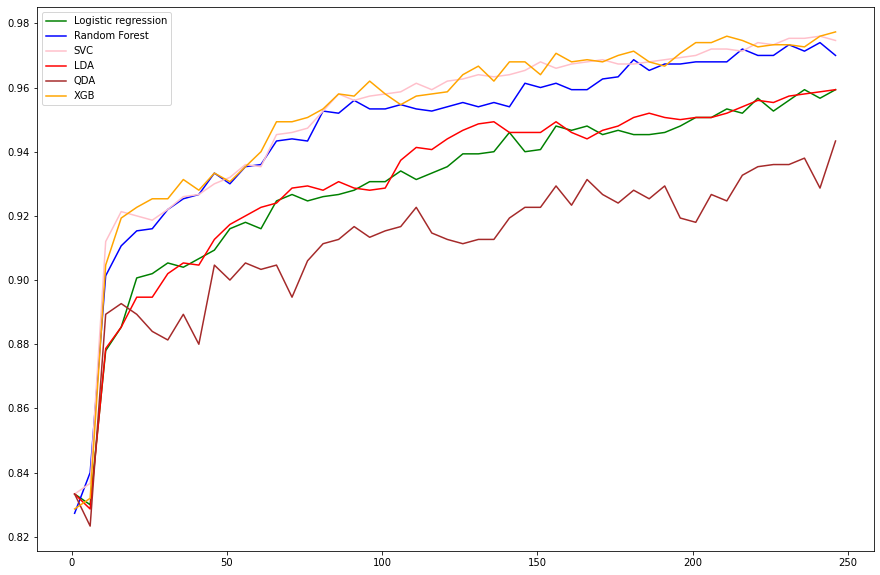

In [146]:
dic = {'rfc_score': [],
        'svc_score': [],
        'lda_score': [],
        'log_score': [],
        'no_fet': [],
        'qda_score': [],
        'xgb_score': []
        }

for i in tqdm(range(1, 250, 5)):

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    selection = SelectKBest(k=i)
    selected = selection.fit_transform(X_train_fin.copy(), y_train_fin)
    X_test_selected = selection.transform(X_test_fin)

    le = LabelEncoder()
    y_xgb = le.fit_transform(y_train_fin)
    y_test_xgb = le.fit_transform(y_test_fin)

    rfc.fit(selected, np.array(y_train_fin).ravel())
    svc.fit(selected, np.array(y_train_fin).ravel())
    lda.fit(selected, np.array(y_train_fin).ravel())
    log.fit(selected, np.array(y_train_fin).ravel())
    qda.fit(selected, np.array(y_train_fin).ravel())
    xgb.fit(selected, np.array(y_xgb).ravel())

    dic['rfc_score'].append(rfc.score(X_test_selected, y_test_fin))
    dic['svc_score'].append(svc.score(X_test_selected, y_test_fin))
    dic['lda_score'].append(lda.score(X_test_selected, y_test_fin))
    dic['log_score'].append(log.score(X_test_selected, y_test_fin))
    dic['qda_score'].append(qda.score(X_test_selected, y_test_fin))
    dic['xgb_score'].append(xgb.score(X_test_selected, y_test_xgb))

    dic['no_fet'].append(i)

plot_dic(dic)

In [ ]:
def score_func(acc, m):
    return acc - 0.01 * ((1/200) * m - 0.25)

results_xgb2 = []
results_rfc2 = []
results_svc2 = []

for i in range(1, len(dic['no_fet'])):
    results_xgb2.append(score_func(dic['xgb_score'][i], dic['no_fet'][i]))
    results_rfc2.append(score_func(dic['rfc_score'][i], dic['no_fet'][i]))
    results_svc2.append(score_func(dic['svc_score'][i], dic['no_fet'][i]))

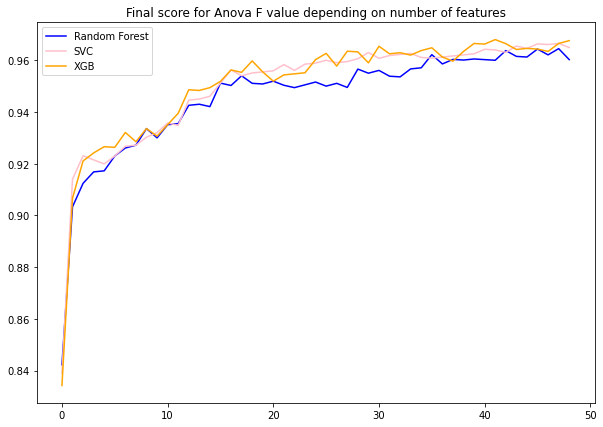

In [186]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(results_rfc2, color='blue', label="Random Forest")
ax.plot(results_svc2, color='pink', label="SVC")
ax.plot(results_xgb2, color='orange', label='XGB')
plt.title("Final score for Anova F value depending on number of features")
ax.legend()

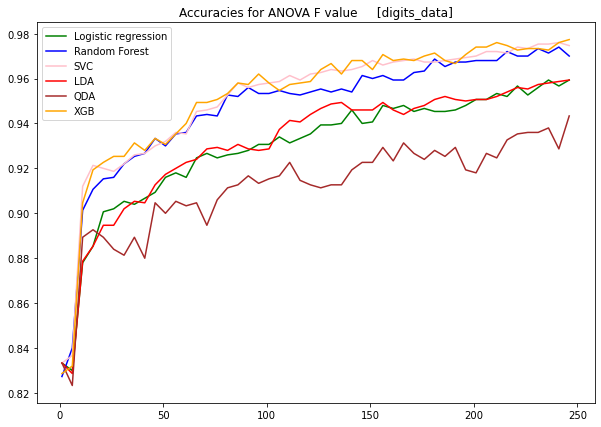

In [183]:
plot_dic(dic, title='Accuracies for ANOVA F value     [digits_data]')

In [187]:
no_fet = dic['no_fet'][np.array(results_xgb2).argmax()]
print(f"Number of features to obtain biggest final score is equal to {no_fet} for {np.array(results_xgb2).max()} score for XGB model" )

Number of features to obtain biggest final score is equal to 206 for 0.96795 score for XGB model


In [173]:
xgb = XGBClassifier()

selection = SelectKBest(k=204)
selected = selection.fit_transform(X_train_fin.copy(), y_train_fin)
X_validation_selected = selection.transform(X_validation)

le = LabelEncoder()
y_xgb = le.fit_transform(y_train_fin)
y_test_xgb = le.fit_transform(y_test_fin)

xgb.fit(selected, np.array(y_xgb).ravel())

In [172]:
features = selection.get_feature_names_out()
new_features = []

for i in features:
    new_features.append(i[1:])

np.savetxt('STAMAT_digits_features.txt', new_features, fmt='%s',  header='"STAMAT"')

proba = xgb.predict_proba(X_validation_selected)
np.savetxt('STAMAT_digits_data.txt', proba[:,1], fmt='%f',  header='"STAMAT"')

## 2. FPR test
##### SelectFpr

In [115]:
from sklearn.feature_selection import SelectFpr

  0%|          | 0/8 [00:00<?, ?it/s]

(1545,)


 12%|█▎        | 1/8 [01:49<12:46, 109.54s/it]

(1864,)


 25%|██▌       | 2/8 [03:52<11:45, 117.53s/it]

(1997,)


 38%|███▊      | 3/8 [05:57<10:03, 120.64s/it]

(2102,)


 50%|█████     | 4/8 [08:10<08:22, 125.72s/it]

(2225,)


 62%|██████▎   | 5/8 [10:31<06:33, 131.22s/it]

(2297,)


 75%|███████▌  | 6/8 [13:18<04:46, 143.37s/it]

(2385,)


 88%|████████▊ | 7/8 [16:03<02:30, 150.47s/it]

(2512,)


100%|██████████| 8/8 [19:16<00:00, 144.54s/it]


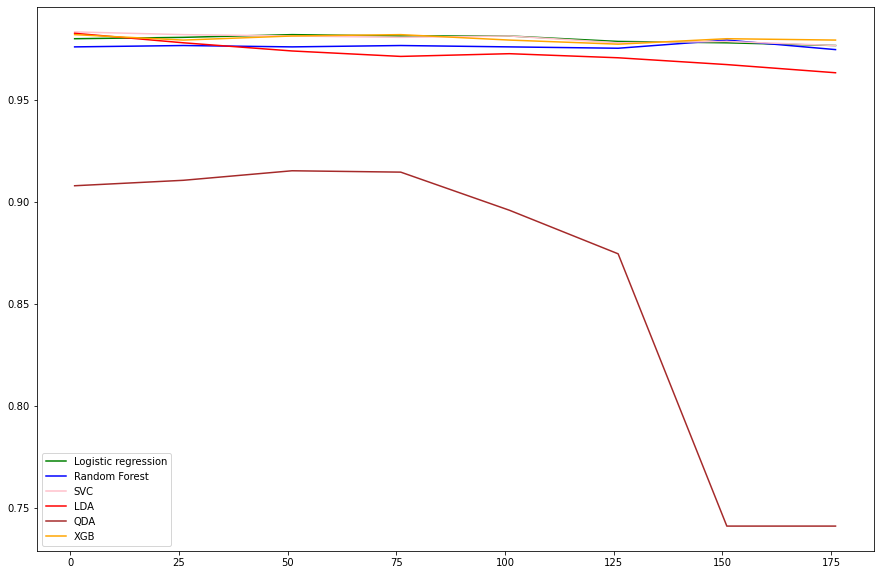

In [127]:
dic_fpr = {'rfc_score': [],
       'svc_score': [],
       'lda_score': [],
       'log_score': [],
       'no_fet': [],
       'qda_score': [],
       'xgb_score': []
       }

for i in tqdm(range(1, 200, 25)):

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    selection = SelectFpr(alpha=i/1000)
    selected = selection.fit_transform(X_train_fin, y_train_fin)
    selected_cols = selection.get_feature_names_out()
    X_test_selected = selection.transform(X_test_fin)

    print(selected_cols.shape)
    le = LabelEncoder()
    y_xgb = le.fit_transform(y_train_fin)
    y_test_xgb = le.fit_transform(y_test_fin)

    rfc.fit(selected, np.array(y_train_fin).ravel())
    svc.fit(selected, np.array(y_train_fin).ravel())
    lda.fit(selected, np.array(y_train_fin).ravel())
    log.fit(selected, np.array(y_train_fin).ravel())
    qda.fit(selected, np.array(y_train_fin).ravel())
    xgb.fit(selected, np.array(y_xgb).ravel())

    dic_fpr['rfc_score'].append(rfc.score(X_test_selected, y_test_fin))
    dic_fpr['svc_score'].append(svc.score(X_test_selected, y_test_fin))
    dic_fpr['lda_score'].append(lda.score(X_test_selected, y_test_fin))
    dic_fpr['log_score'].append(log.score(X_test_selected, y_test_fin))
    dic_fpr['qda_score'].append(qda.score(X_test_selected, y_test_fin))
    dic_fpr['xgb_score'].append(xgb.score(X_test_selected, y_test_xgb))

    dic_fpr['no_fet'].append(i)

plot_dic(dic_fpr)

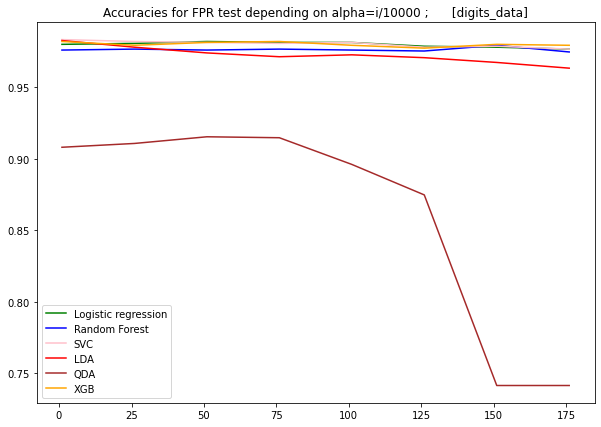

In [182]:
plot_dic(dic_fpr, 'Accuracies for FPR test depending on alpha=i/10000 ;      [digits_data]')

## 3. Family-wise error rate
#### Select Fwe

In [129]:
from sklearn.feature_selection import SelectFwe

  0%|          | 0/39 [00:00<?, ?it/s]

(4500, 1187)


  3%|▎         | 1/39 [01:21<51:52, 81.91s/it]

(4500, 1222)


  5%|▌         | 2/39 [02:42<50:06, 81.26s/it]

(4500, 1234)


  8%|▊         | 3/39 [04:04<48:59, 81.66s/it]

(4500, 1244)


 10%|█         | 4/39 [05:26<47:39, 81.71s/it]

(4500, 1255)


 13%|█▎        | 5/39 [06:44<45:29, 80.28s/it]

(4500, 1262)


 15%|█▌        | 6/39 [08:11<45:22, 82.49s/it]

(4500, 1270)


 18%|█▊        | 7/39 [09:47<46:20, 86.90s/it]

(4500, 1277)


 21%|██        | 8/39 [11:18<45:33, 88.19s/it]

(4500, 1284)


 23%|██▎       | 9/39 [12:48<44:28, 88.95s/it]

(4500, 1285)


 26%|██▌       | 10/39 [14:24<44:02, 91.11s/it]

(4500, 1291)


 28%|██▊       | 11/39 [15:54<42:19, 90.71s/it]

(4500, 1298)


 31%|███       | 12/39 [17:17<39:43, 88.27s/it]

(4500, 1300)


 33%|███▎      | 13/39 [18:46<38:26, 88.72s/it]

(4500, 1302)


 36%|███▌      | 14/39 [20:14<36:51, 88.48s/it]

(4500, 1304)


 38%|███▊      | 15/39 [21:43<35:25, 88.55s/it]

(4500, 1307)


 41%|████      | 16/39 [23:06<33:19, 86.94s/it]

(4500, 1310)


 44%|████▎     | 17/39 [24:32<31:48, 86.74s/it]

(4500, 1313)


 46%|████▌     | 18/39 [25:59<30:20, 86.69s/it]

(4500, 1317)


 49%|████▊     | 19/39 [27:21<28:24, 85.24s/it]

(4500, 1322)


 51%|█████▏    | 20/39 [28:50<27:21, 86.40s/it]

(4500, 1324)


 54%|█████▍    | 21/39 [30:19<26:08, 87.13s/it]

(4500, 1325)


 56%|█████▋    | 22/39 [31:43<24:23, 86.11s/it]

(4500, 1329)


 59%|█████▉    | 23/39 [33:14<23:25, 87.84s/it]

(4500, 1331)


 62%|██████▏   | 24/39 [34:37<21:31, 86.11s/it]

(4500, 1332)


 64%|██████▍   | 25/39 [36:07<20:23, 87.40s/it]

(4500, 1333)


 67%|██████▋   | 26/39 [37:37<19:08, 88.31s/it]

(4500, 1333)


 69%|██████▉   | 27/39 [39:05<17:35, 87.96s/it]

(4500, 1335)


 72%|███████▏  | 28/39 [40:30<16:00, 87.32s/it]

(4500, 1337)


 74%|███████▍  | 29/39 [41:58<14:34, 87.45s/it]

(4500, 1339)


 77%|███████▋  | 30/39 [43:27<13:10, 87.81s/it]

(4500, 1340)


 79%|███████▉  | 31/39 [45:03<12:02, 90.26s/it]

(4500, 1342)


 82%|████████▏ | 32/39 [46:48<11:03, 94.72s/it]

(4500, 1343)


 85%|████████▍ | 33/39 [48:28<09:38, 96.36s/it]

(4500, 1343)


 87%|████████▋ | 34/39 [50:04<08:01, 96.37s/it]

(4500, 1343)


 90%|████████▉ | 35/39 [51:45<06:30, 97.59s/it]

(4500, 1346)


 92%|█████████▏| 36/39 [53:22<04:52, 97.34s/it]

(4500, 1348)


 95%|█████████▍| 37/39 [54:52<03:10, 95.32s/it]

(4500, 1348)


 97%|█████████▋| 38/39 [56:20<01:33, 93.02s/it]

(4500, 1348)


100%|██████████| 39/39 [58:02<00:00, 89.29s/it]


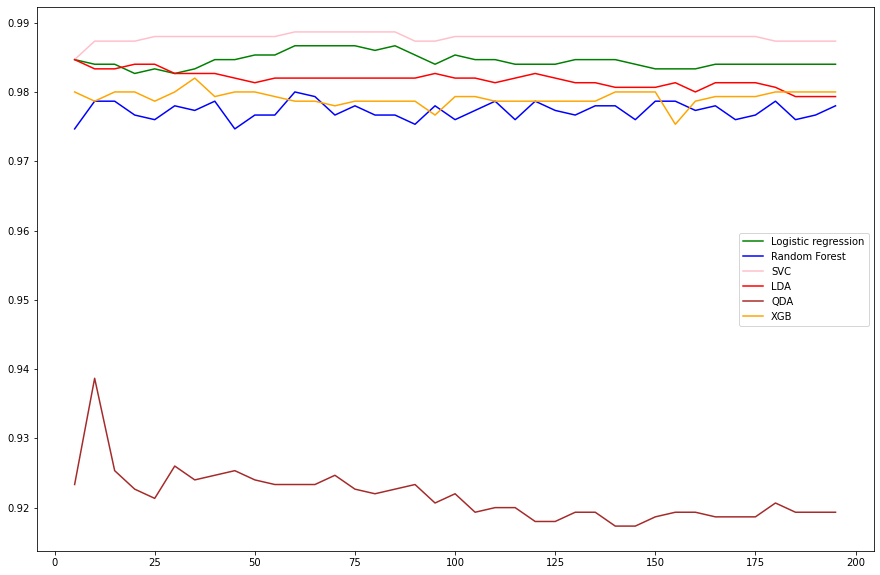

In [130]:
dic_fwe = {'rfc_score': [],
           'svc_score': [],
           'lda_score': [],
           'log_score': [],
           'no_fet': [],
           'qda_score': [],
           'xgb_score': []
           }

for i in tqdm(range(5, 200, 5)):
    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    selection = SelectFwe(f_classif, alpha=i/1000)
    selected_fwe = selection.fit_transform(X_train_fin, y_train_fin)
    X_test_selected_fwe = selection.transform(X_test_fin)
    print(selected_fwe.shape)

    rfc.fit(selected_fwe, np.array(y_train_fin).ravel())
    svc.fit(selected_fwe, np.array(y_train_fin).ravel())
    lda.fit(selected_fwe, np.array(y_train_fin).ravel())
    log.fit(selected_fwe, np.array(y_train_fin).ravel())
    qda.fit(selected_fwe, np.array(y_train_fin).ravel())
    xgb.fit(selected_fwe, np.array(y_xgb).ravel())

    dic_fwe['rfc_score'].append(rfc.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['svc_score'].append(svc.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['lda_score'].append(lda.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['log_score'].append(log.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['qda_score'].append(qda.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['xgb_score'].append(xgb.score(X_test_selected_fwe, y_test_xgb))

    dic_fwe['no_fet'].append(i)

plot_dic(dic_fwe)

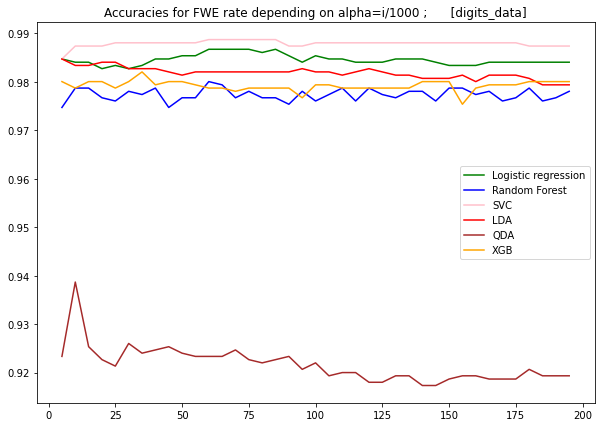

In [181]:
plot_dic(dic_fwe, 'Accuracies for FWE rate depending on alpha=i/1000 ;      [digits_data]')

## 4. Selection from RandomForestClassifier
#### SelectFromModel

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

100%|██████████| 5/5 [42:11<00:00, 506.24s/it]


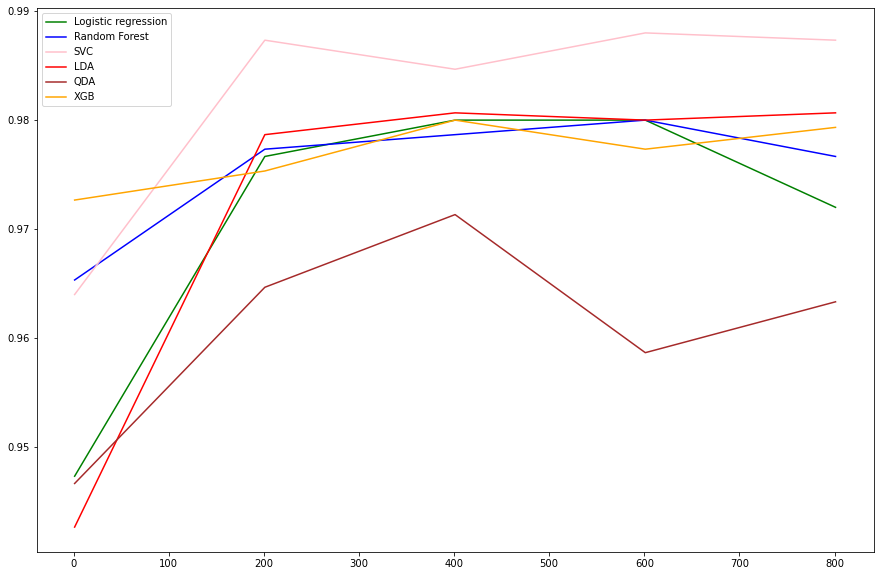

In [124]:
dic_fi = {'rfc_score': [],
       'svc_score': [],
       'lda_score': [],
       'log_score': [],
       'no_fet': [],
       'qda_score': [],
       'xgb_score': []
       }

for i in tqdm(range(1, 1000, 200)):

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    sel = SelectFromModel(RandomForestClassifier(n_estimators = i))
    sel.fit(X_train_fin, y_train_fin)
    X_train_fin = pd.DataFrame(X_train_fin)
    X_test_fin = pd.DataFrame(X_test_fin)
    selected_feat = X_train_fin.columns[(sel.get_support())]
    selected = X_train_fin.loc[:, selected_feat]
    X_test_selected = X_test_fin.loc[:, selected_feat]

    le = LabelEncoder()
    y_xgb = le.fit_transform(y_train_fin)
    y_test_xgb = le.fit_transform(y_test_fin)

    rfc.fit(selected, np.array(y_train_fin).ravel())
    svc.fit(selected, np.array(y_train_fin).ravel())
    lda.fit(selected, np.array(y_train_fin).ravel())
    log.fit(selected, np.array(y_train_fin).ravel())
    qda.fit(selected, np.array(y_train_fin).ravel())
    xgb.fit(selected, np.array(y_xgb).ravel())

    dic_fi['rfc_score'].append(rfc.score(X_test_selected, y_test_fin))
    dic_fi['svc_score'].append(svc.score(X_test_selected, y_test_fin))
    dic_fi['lda_score'].append(lda.score(X_test_selected, y_test_fin))
    dic_fi['log_score'].append(log.score(X_test_selected, y_test_fin))
    dic_fi['qda_score'].append(qda.score(X_test_selected, y_test_fin))
    dic_fi['xgb_score'].append(xgb.score(X_test_selected, y_test_xgb))

    dic_fi['no_fet'].append(i)

plot_dic(dic_fi)

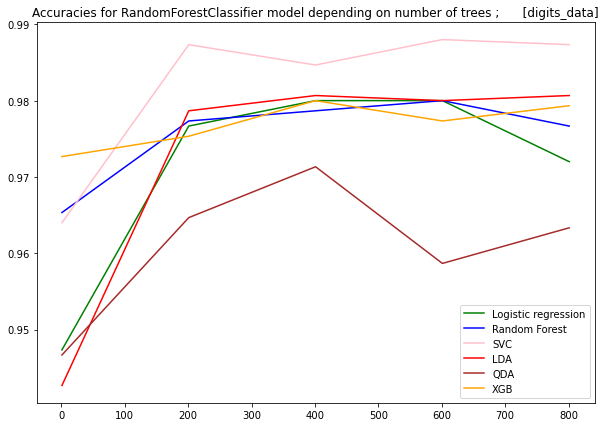

In [180]:
plot_dic(dic_fi, 'Accuracies for RandomForestClassifier model depending on number of trees ;      [digits_data]')

## 5. Kernel PCA

In [107]:
y_test_fin.shape

(500,)

100%|██████████| 20/20 [07:21<00:00, 22.06s/it]


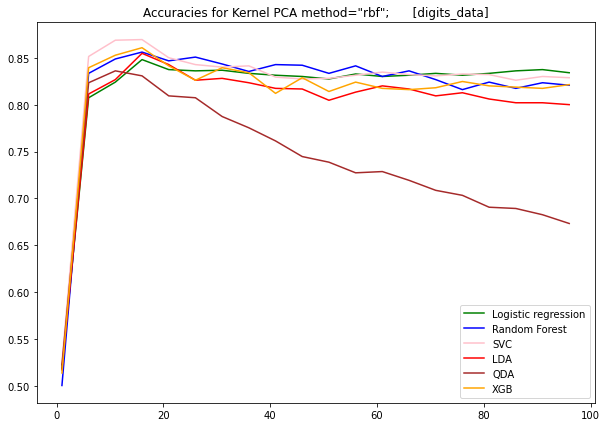

In [179]:
dic_kpca = {'rfc_score': [],
        'svc_score': [],
        'lda_score': [],
        'log_score': [],
       'qda_score': [],
       'xgb_score': [],
        'no_fet': []
        }

le = LabelEncoder()
y_xgb_kpca = le.fit_transform(y_train_fin)
y_test_xgb_kpca = le.fit_transform(y_test_fin)

log = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
xgb = XGBClassifier()

for i in tqdm(range(1, 100, 5)):
    kpca = KernelPCA(kernel="rbf", n_components=i)

    X_train_kpca = kpca.fit_transform(X_train_fin)

    rfc.fit(X_train_kpca, np.array(y_train_fin).ravel())
    svc.fit(X_train_kpca, np.array(y_train_fin).ravel())
    lda.fit(X_train_kpca, np.array(y_train_fin).ravel())
    log.fit(X_train_kpca, np.array(y_train_fin).ravel())
    qda.fit(X_train_kpca, np.array(y_train_fin).ravel())
    xgb.fit(X_train_kpca, np.array(y_xgb_kpca).ravel())

    X_test_kpca = kpca.fit_transform(X_test_fin)

    dic_kpca['rfc_score'].append(rfc.score(X_test_kpca, y_test_fin))
    dic_kpca['svc_score'].append(svc.score(X_test_kpca, y_test_fin))
    dic_kpca['lda_score'].append(lda.score(X_test_kpca, y_test_fin))
    dic_kpca['log_score'].append(log.score(X_test_kpca, y_test_fin))
    dic_kpca['qda_score'].append(qda.score(X_test_kpca, y_test_fin))
    dic_kpca['xgb_score'].append(xgb.score(X_test_kpca, y_test_xgb_kpca))

    dic_kpca['no_fet'].append(i)

plot_dic(dic_kpca, 'Accuracies for Kernel PCA method="rbf";      [digits_data]')